## Exercise 2.01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

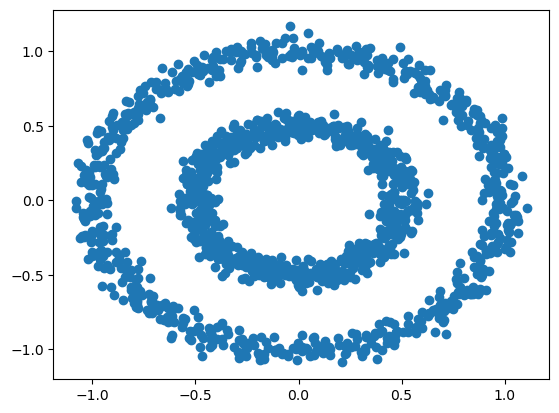

In [2]:
data = pd.read_csv("circles.csv")
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

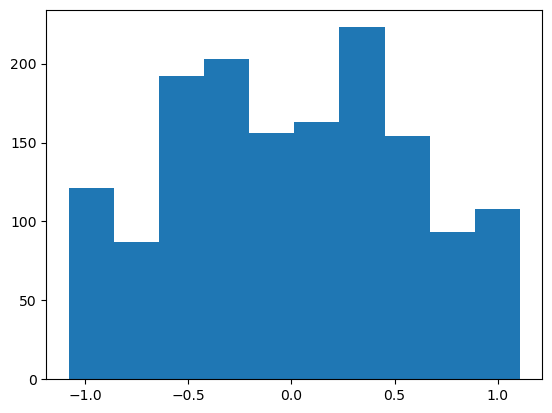

In [3]:
plt.hist(data.iloc[:,0])
plt.show()

## Exercise 2.02

In [4]:
from sklearn.cluster import KMeans

In [5]:
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data)
    
    ideal_k.append([i,est_kmeans.inertia_])

C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

In [6]:
ideal_k = np.array(ideal_k)

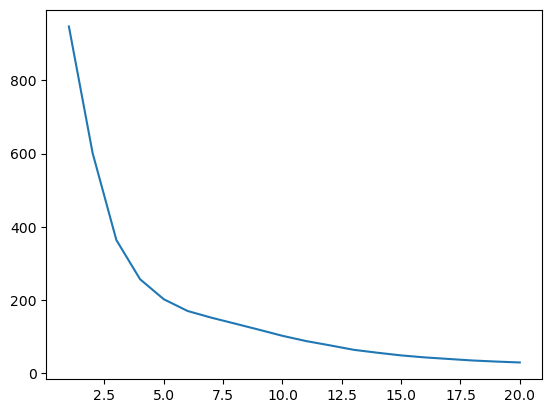

In [7]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

Based on the graph, 5 clusters were chosen

In [8]:
est_kmeans = KMeans(n_clusters=5, random_state=0)
est_kmeans.fit(data)
pred_kmeans = est_kmeans.predict(data)

C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lvcie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


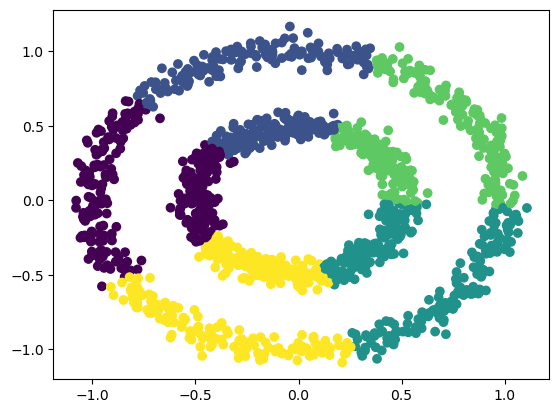

In [9]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_kmeans)
plt.show()

## Exercise 2.03

In [10]:
from sklearn.cluster import MeanShift

In [12]:
est_meanshift = MeanShift()
est_meanshift.fit(data)
pred_meanshift = est_meanshift.predict(data)

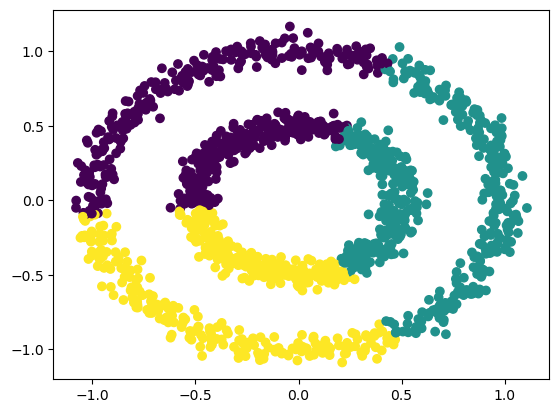

In [13]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_meanshift)
plt.show()

## Exercise 2.04

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
est_dbscan = DBSCAN(eps=0.1)
pred_dbscan = est_dbscan.fit_predict(data)

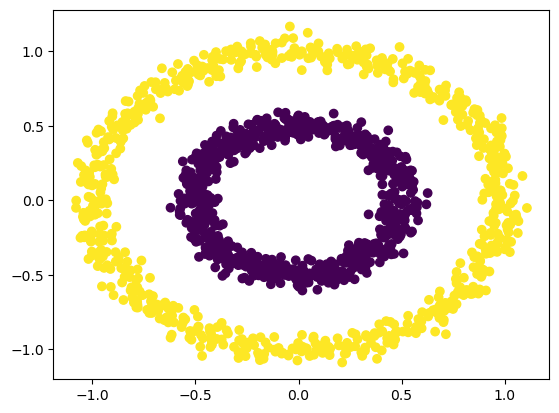

In [16]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_dbscan)
plt.show()

## Exercise 2.05

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [18]:
kmeans_score = silhouette_score(data, pred_kmeans, metric='euclidean')
meanshift_score = silhouette_score(data, pred_meanshift, metric='euclidean')
dbscan_score = silhouette_score(data, pred_dbscan, metric='euclidean')
print(kmeans_score, meanshift_score, dbscan_score)

0.35944240125748783 0.38619196154704827 0.11394082711912518


In [19]:
kmeans_score = calinski_harabasz_score(data, pred_kmeans)
meanshift_score = calinski_harabasz_score(data, pred_meanshift)
dbscan_score = calinski_harabasz_score(data, pred_dbscan)
print(kmeans_score, meanshift_score, dbscan_score)

1379.6867334360659 1185.142818570484 0.0017164732936172393
